In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

import matplotlib.pyplot as plt
from matplotlib import rc



###Plot settings:
plt.rc('text', usetex=True)
plt.rcParams['text.usetex'] = True  # Mantén LaTeX activado para fuentes
plt.rcParams['text.latex.preamble']=r'\usepackage{amsmath}'
plt.rcParams['text.latex.preamble'] = r'\boldmath'

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 2
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 2
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

Bad value in file PosixPath('/Users/flaviopineda/.matplotlib/stylelib/style.mplstyle'), line 50 ("axes.prop_cycle : cycler('color', ['#1F77B4', '#D62728', '#2CA02C', '#FF7F0E', '#7F7F7F', '#9467BD'])"): Key axes.prop_cycle: "cycler('color', ['" is not a valid cycler construction: EOL while scanning string literal (<unknown>, line 1)


In [2]:
#Numerical parameters. We use natural units. 

M_p = 1;                        #Reduced mass Planck
M = 1.3e-5;                 #Scalaron mass
lambda_h = 1e-10;               #auto-coupling Higgs constant
xi_s = 1/(3*M**2);         #Dimensionless scalaron mass
xi_h = 0.1    #new constant coupling 
alpha = np.sqrt(2/3); 

In [3]:
#Potential and its first derivatives 

def V(phi,h):
    return np.exp(-2*alpha*phi)*(lambda_h*h**4 + (np.exp(alpha*phi) - 1 - xi_h*h**2)**2/xi_s)/4

def V_phi(phi, h):
    return np.exp(-2*alpha*phi)*((1 + xi_h*h**2)*(np.exp(alpha*phi) -1 - xi_h*h**2) - lambda_h*xi_s*h**4)/(np.sqrt(6)*xi_s)

def V_h(phi, h):
    return np.exp(-2*alpha*phi)*h*(-xi_h*(np.exp(alpha*phi) -1 - xi_h*h**2) +lambda_h*xi_s*h**2)/xi_s

In [4]:

#Initial conditions to numerically solve the background equations of motion for Higgs-R^2 model. We need choose a suitable initial conditions for phi, h 
#and scale factor a. We use dimenssionless variables 

phi_0 = 5.7;    #Initial scalaron value.
h_0 = np.sqrt(xi_h*(np.exp(alpha*phi_0) -1)/(xi_h**2 + lambda_h*xi_s));   #Initial Higgs value along the vallyes of the potential 
y_0 = 0;    #Initial scalaron velocity
z_0 = 0;    #Initial Higgs velocity
H_0 = np.sqrt((y_0**2 + np.exp(-alpha*phi_0)*z_0**2 + 2*V(phi_0, h_0))/6); #Initial value of Hubble Parameter in M units
a_0 =  1e-3;     #Initial value of scale factor
N_0 = 0;    #Initial value of number of e-folds 
F0 = [phi_0, y_0, h_0, z_0, H_0, a_0, N_0]; #Array of initial conditions

In [5]:
#Sytem of ODE's we have to solve in order to find the number of e-folds and background dynamics

def dFdt(t, F):
    [phi, y, h, z, H, a, N] = F

    dphidt = y;
    dydt = -3*H*y - 0.5*alpha*np.exp(-alpha*phi)*z**2-V_phi(phi,h);
    dhdt = z;
    dzdt = -3*H*z + alpha*y*z - np.exp(alpha*phi)*V_h(phi,h);
    dHdt = -0.5*(y**2+np.exp(-alpha*phi)*z**2);
    dadt = a*H;
    dNdt = H;

    return [dphidt, dydt, dhdt, dzdt, dHdt, dadt, dNdt]

In [6]:
#Solutions with solve-ivp ODE's solver 
teval = np.linspace(0, 2e7, 10000)
sol = solve_ivp(dFdt, t_span = [0, 2e7], y0 = F0, t_eval = None, method= "LSODA", rtol = 1e-5, atol = 1e-10)
t = sol.t
phi, y, h, z, H, a, N = sol.y

#Time derivative of Hubble parameter 
dHdt = np.gradient(H, t)

In [7]:
#When does inflation end?

epsilon = - dHdt/H**2
end_inflation_index = np.argmax(epsilon >= 1)
t_end = t[end_inflation_index]

In [8]:
Nt = N[end_inflation_index];  #Total number of e-folds  
Ne = Nt - N;    #Efolds before the end of inflation
aH = a*H;    #Comoving Hubble radius
Nt

np.float64(82.4370077440902)

In [9]:
#Background velocity 
dot_sigma = np.sqrt(y**2 + np.exp(-alpha*phi)*z**2)
V_s = np.exp(alpha*phi/2)*(V_h(phi, h)*y - np.exp(-alpha*phi)*V_phi(phi, h)*z) 

eta_perp = V_s/(H*dot_sigma**2)

/var/folders/ym/g3zmjphd5kj9rmvdfmq2bpgr0000gn/T/ipykernel_43576/2172911536.py:5: RuntimeWarning: invalid value encountered in divide
  eta_perp = V_s/(H*dot_sigma**2)


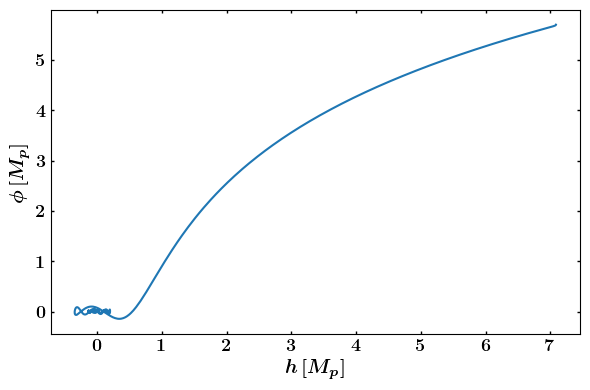

In [10]:

# Ajusta el tamaño de la figura si es necesario para publicaciones
plt.figure(figsize=(6, 4))

# Ajustes de los ticks
plt.tick_params(axis='both', direction="in", labelsize=13, top=True, right=True)
plt.tick_params(axis="both", which='minor', direction='in', top=True, right=True)


# Etiquetas de los ejes
plt.xlabel(r"$h\,[M_p]$", fontsize=14)
plt.ylabel(r"$\phi\,[M_p]$", fontsize=14)

# Gráficas con colores y grosores adecuados
plt.plot(h, phi, color='#1f77b4', linewidth=1.5)

# Ajuste de los márgenes para evitar que elementos se corten
plt.tight_layout()

# Muestra la gráfica o guarda la imagen
#plt.savefig('trayectory_class4.png', dpi=300, bbox_inches='tight', pad_inches=0.1, format='png')

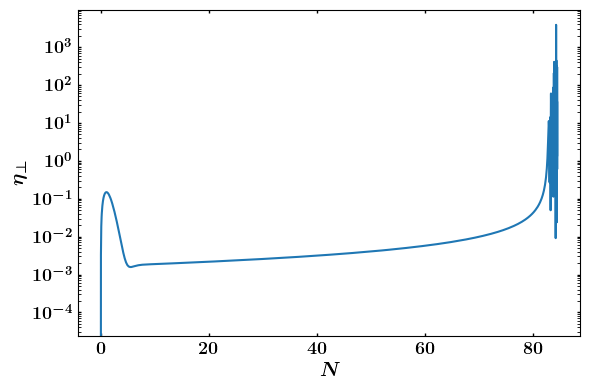

In [11]:

# Ajusta el tamaño de la figura si es necesario para publicaciones
plt.figure(figsize=(6, 4))

# Ajustes de los ticks
plt.tick_params(axis='both', direction="in", labelsize=13, top=True, right=True)
plt.tick_params(axis="both", which='minor', direction='in', top=True, right=True)


# Etiquetas de los ejes
plt.xlabel(r"$N$", fontsize=14)
plt.ylabel(r"$\eta_\perp$", fontsize=14)

# Gráficas con colores y grosores adecuados
plt.semilogy(N, abs(eta_perp), color='#1f77b4', linewidth=1.5)

# Ajuste de los márgenes para evitar que elementos se corten
plt.tight_layout()

#plt.axvline( x = Nt, color="red", linestyle="--", label="End of inflation")
#plt.xticks(ticks=[10, 20, 30, 40, 50, 60, Nt], labels=[10, 20, 30, 40, 50, 60, r"$N_\mathrm{tot}$"])

# Muestra la gráfica o guarda la imagen
#plt.savefig('bending_class4.png', dpi=300, bbox_inches='tight', pad_inches=0.1, format='png')


In [12]:
np.savetxt('data/inf_bg_data', np.c_[t, phi, y, h, z, H, a, N, Ne, aH])
print('\n\t--- Data saved successfully : inf_bg_data ---\n')


	--- Data saved successfully : inf_bg_data ---

